In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#importing dataset
df = pd.read_csv("covidph.csv")
df.head()

,Case,Age,Sex,Nationality,Status,Transmission
0,PH1,38,Female,Chinese,Recovered,Imported
1,PH2,44,Male,Chinese,Deceased,Imported
2,PH3,60,Female,Chinese,Recovered,Imported
3,PH4,48,Male,Filipino,Recovered,Imported
4,PH5,62,Male,Filipino,Deceased,Local


In [3]:
# reorganizing indexes
df= df.reindex(columns = ["Case", 'Age', 'Sex', 'Nationality', 'Transmission', 'Status'])
df.head()

,Case,Age,Sex,Nationality,Transmission,Status
0,PH1,38,Female,Chinese,Imported,Recovered
1,PH2,44,Male,Chinese,Imported,Deceased
2,PH3,60,Female,Chinese,Imported,Recovered
3,PH4,48,Male,Filipino,Imported,Recovered
4,PH5,62,Male,Filipino,Local,Deceased


In [4]:
age = df['Age']
status = df['Status']
status

0      Recovered
1       Deceased
2      Recovered
3      Recovered
4       Deceased
         ...    
138     Deceased
139     Deceased
140     Deceased
141     Deceased
142     Deceased
Name: Status, Length: 143, dtype: object

In [5]:
df = df.replace(['None'],'Foreign')
df = df.replace(['Chinese'],'Foreign')
df = df.replace(['American'],'Foreign')
df = df.replace(['British'],'Foreign')
df = df.replace(['Chinese, Taiwanese'],'Foreign')
df = df.replace(['Imported'],'Foreign')
df

,Case,Age,Sex,Nationality,Transmission,Status
0,PH1,38,Female,Foreign,Foreign,Recovered
1,PH2,44,Male,Foreign,Foreign,Deceased
2,PH3,60,Female,Foreign,Foreign,Recovered
3,PH4,48,Male,Filipino,Foreign,Recovered
4,PH5,62,Male,Filipino,Local,Deceased
...,...,...,...,...,...,...
138,PH1488,60,Male,Foreign,Local,Deceased
139,PH1489,74,Male,Filipino,Local,Deceased
140,PH1508,72,Female,Filipino,Local,Deceased
141,PH1811,66,Male,Filipino,Local,Deceased


In [6]:

df = df[df["Nationality"] !="Foreign"]
df

,Case,Age,Sex,Nationality,Transmission,Status
3,PH4,48,Male,Filipino,Foreign,Recovered
4,PH5,62,Male,Filipino,Local,Deceased
5,PH6,59,Female,Filipino,Local,Deceased
8,PH10,57,Male,Filipino,Foreign,Recovered
9,PH11,72,Male,Filipino,Local,Recovered
...,...,...,...,...,...,...
137,PH1447,45,Male,Filipino,Local,Deceased
139,PH1489,74,Male,Filipino,Local,Deceased
140,PH1508,72,Female,Filipino,Local,Deceased
141,PH1811,66,Male,Filipino,Local,Deceased


In [7]:
df.drop(columns = 'Nationality', inplace=True)
df

C:\Users\Owner\AppData\Local\Temp\ipykernel_19336\2496133662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = 'Nationality', inplace=True)


,Case,Age,Sex,Transmission,Status
3,PH4,48,Male,Foreign,Recovered
4,PH5,62,Male,Local,Deceased
5,PH6,59,Female,Local,Deceased
8,PH10,57,Male,Foreign,Recovered
9,PH11,72,Male,Local,Recovered
...,...,...,...,...,...
137,PH1447,45,Male,Local,Deceased
139,PH1489,74,Male,Local,Deceased
140,PH1508,72,Female,Local,Deceased
141,PH1811,66,Male,Local,Deceased


In [8]:
age = df["Age"]
sex = df["Sex"]
trans = df["Transmission"]
stat = df["Status"]
df.isna().sum()

Case            0
Age             0
Sex             0
Transmission    0
Status          0
dtype: int64

In [9]:
age.value_counts()

72    6
64    5
67    5
60    5
80    5
74    4
57    4
73    4
46    4
71    3
65    3
76    3
35    3
75    3
79    3
48    3
69    3
56    3
34    3
51    3
41    3
82    2
83    2
59    2
86    2
61    2
70    2
68    2
66    2
62    2
63    2
45    2
39    2
78    2
30    2
77    2
89    1
43    1
32    1
81    1
50    1
54    1
58    1
55    1
13    1
21    1
44    1
33    1
25    1
26    1
88    1
28    1
31    1
24    1
84    1
Name: Age, dtype: int64

In [10]:
stat.value_counts()

Deceased     81
Recovered    46
Name: Status, dtype: int64

In [11]:
trans.value_counts()

Local      107
Foreign     20
Name: Transmission, dtype: int64

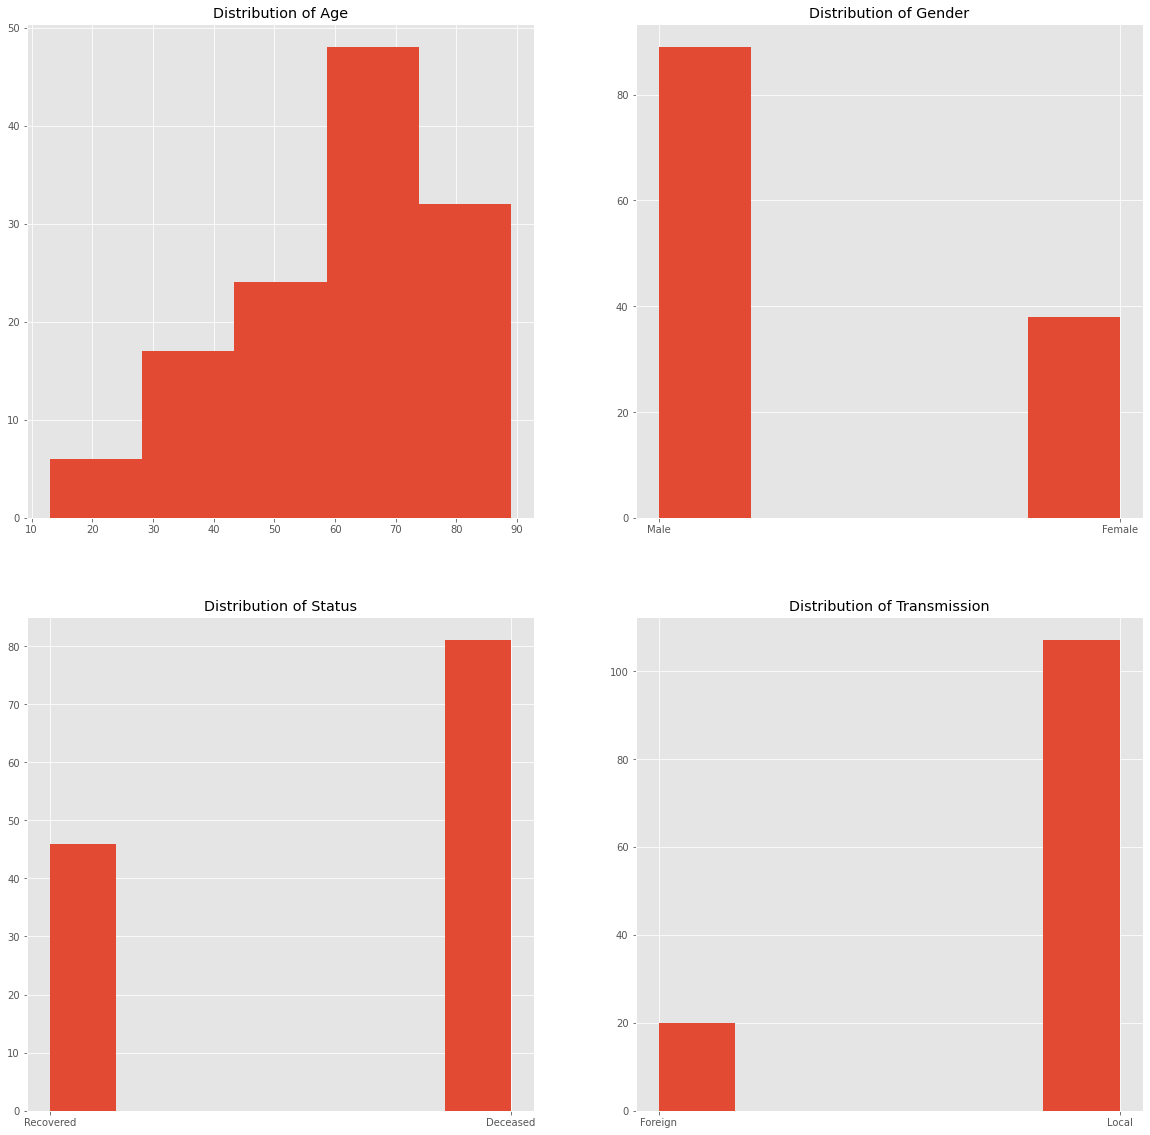

In [12]:
plt.style.use("ggplot")
fig, axes = plt.subplots(2, 2, figsize=(20,20))

axes[0,0].set_title("Distribution of Age")
axes[0,0].hist(age, bins=5);
axes[0,1].set_title("Distribution of Gender")
axes[0,1].hist(sex, bins=5);
axes[1,0].set_title("Distribution of Status")
axes[1,0].hist(stat, bins=7);
axes[1,1].set_title("Distribution of Transmission")
axes[1,1].hist(trans, bins=6);

<AxesSubplot:xlabel='Age', ylabel='Sex'>

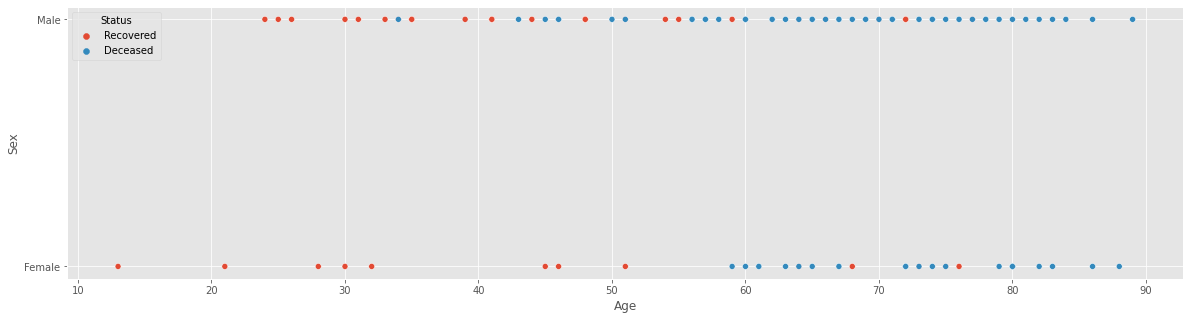

In [13]:

fig_dims = (20, 5)

fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = age, y =sex, hue=status, data = df)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

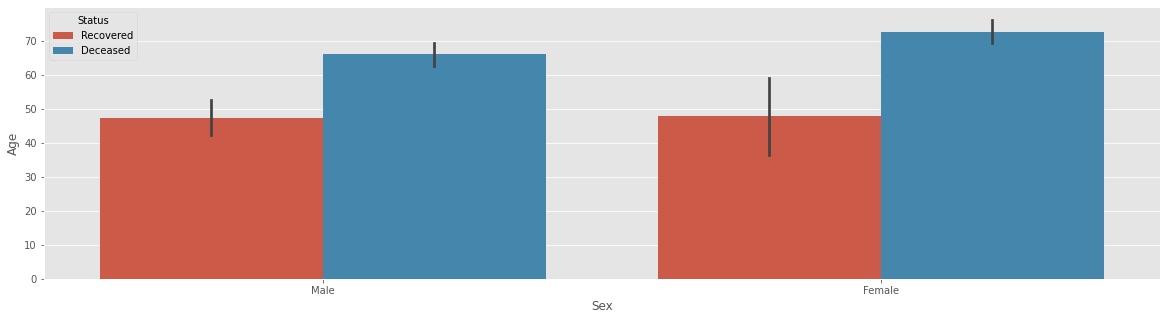

In [14]:

fig_dims = (20, 5)

fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = sex, y =age, hue=status, data = df)

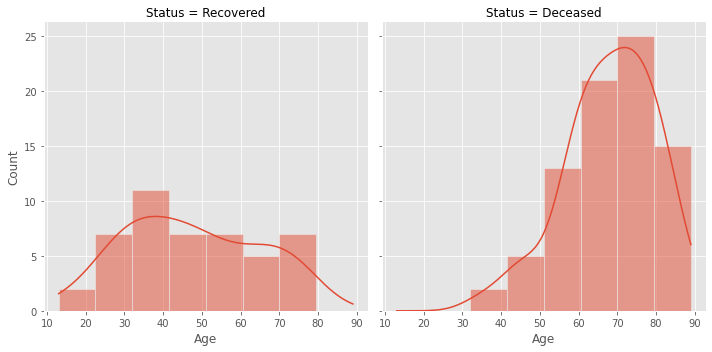

In [15]:

sns.displot(data=df, x=age, col=status, kde=True)

### 
    The given dataset is not balanced for the feature "Sex" as it contains more 'Male'.
    The given dataset is not balanced for the feature "Nationality" as Filipino in the nationality feature dominates.
    It seems that more people died than getting recoverd from COVID.
    Scatterplot suggests that people who died were beyond the age 30. So, it seems like the chances of getting recovered for the age below 30 is extremely high.
    The transmission is more local than imported.
    It is also important to explore more about how the data collection was done as the dataset contains more filipino data when compared to other nationalities.
    Age seems to be ~60% negatively co-related with Status. There is little to no co-relation between any of the pairs except 'Age and Status'

In [18]:
df

,Case,Age,Sex,Transmission,Status
3,PH4,48,Male,Foreign,Recovered
4,PH5,62,Male,Local,Deceased
5,PH6,59,Female,Local,Deceased
8,PH10,57,Male,Foreign,Recovered
9,PH11,72,Male,Local,Recovered
...,...,...,...,...,...
137,PH1447,45,Male,Local,Deceased
139,PH1489,74,Male,Local,Deceased
140,PH1508,72,Female,Local,Deceased
141,PH1811,66,Male,Local,Deceased


<AxesSubplot:title={'center':'Age'}, xlabel='Status'>

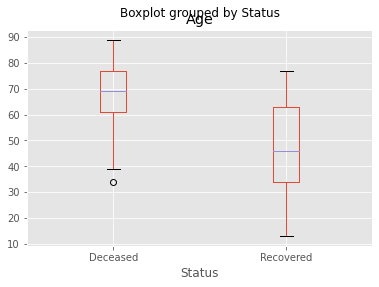

In [20]:
df.boxplot("Age", by = "Status")

In [23]:
mod = ols('Age ~ Status', data = df ).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Status,12452.197252,1.0,64.371752,6.385495e-13
Residual,24180.243693,125.0,NaN,NaN
